In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/esmeralda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# load data
text_comments = pd.read_csv('data/commit_comments.csv')
text_comments.comment = text_comments.comment.astype(str) 

In [6]:
# add sentiment scoring and labels to data
analyzer = SentimentIntensityAnalyzer()

text_comments['sc_scores'] =text_comments['comment'].apply(lambda comment:analyzer.polarity_scores(comment))
text_comments['compound'] = text_comments['sc_scores'].apply(lambda score_dict:score_dict['compound'])
text_comments['label'] = text_comments['compound'].apply(lambda c:'pos' if c>=0 else 'neg')


print(text_comments.head())

                                             comment  \
0  Yeah, but I don't like to post that until *aft...   
1                                Cool. Thank you :-)   
2  Thanks -- I thought the slides were pretty goo...   
3    Edy, 4.2-milestone-1 hasn't been released yet..   
4  ^^ sorry but your index.php don't work with me...   

                                           sc_scores  compound label  
0  {'neg': 0.146, 'neu': 0.766, 'pos': 0.088, 'co...   -0.2651   neg  
1  {'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...    0.7269   pos  
2  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...    0.8402   pos  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   pos  
4  {'neg': 0.099, 'neu': 0.687, 'pos': 0.215, 'co...    0.3291   pos  


Text(0.5, 0, '')

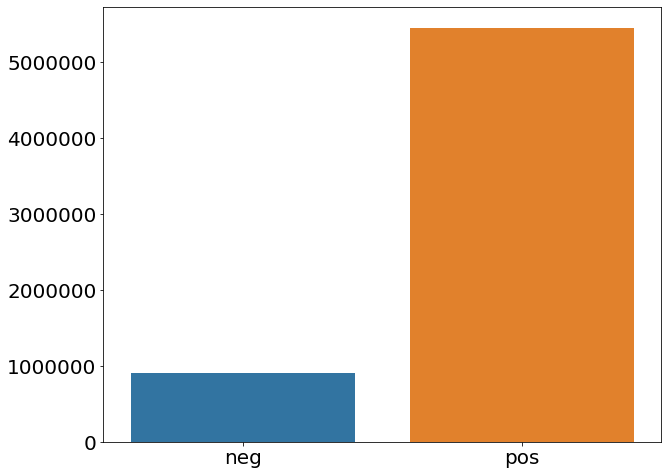

In [8]:
# visualization
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 20})
sns.countplot('label', data = text_comments)
plt.ylabel('')
plt.xlabel('')

In [10]:
# save labeled dataset
text_comments.to_csv("data/labeled_commit_comments.csv", index=False)